<a href="https://colab.research.google.com/github/zsd1024/zzzzz/blob/main/limu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install -U d2l


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
  

In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples):
  """生成 y = Xw + b +噪声。"""
  X = torch.normal(0,1,(num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features[0],'\nlabel:' ,labels[0])

features: tensor([-0.2629, -0.3784]) 
label: tensor([4.9591])


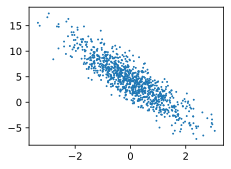

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),
                labels.detach().numpy(),1)

In [ ]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  #这些样本是随机读取的，没有特定的顺序
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(
        indices[i:min(i+ batch_size, num_examples)]
    )
    yield features[batch_indices],labels[batch_indices]

batch_size = 10
for X,y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[ 1.5375,  0.8791],
        [-0.2890, -0.8672],
        [ 0.5721, -0.3185],
        [ 2.2702,  1.2341],
        [ 1.8344,  1.1563],
        [-0.7515,  0.2355],
        [-1.9851,  0.1277],
        [-1.6124, -0.3745],
        [ 0.3056,  0.2491],
        [-1.2836,  0.3261]]) 
 tensor([[ 4.2959],
        [ 6.5587],
        [ 6.4285],
        [ 4.5427],
        [ 3.9494],
        [ 1.8907],
        [-0.2164],
        [ 2.2528],
        [ 3.9731],
        [ 0.5127]])


In [ ]:
#定义初始化模型参数
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
#定义模型
def linreg(X, w,b):
  """线性回归模型"""
  return torch.matmul(X,w) + b

In [ ]:
#定义损失函数
def squared_loss(y_hat, y):
  """均方损失"""
  return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


In [ ]:
#定义优化算法
def sgd(params, lr, batch_size):
  """小批量随机梯度下降"""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

In [ ]:
#训练过程
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X,w,b),y)
    l.sum().backward()
    sgd([w,b], lr,batch_size)
  with torch.no_grad():
    train_l = loss(net(features,w,b), labels)
    print(f'epoch{epoch + 1}, loss{float(train_l.mean()):f}')

epoch1, loss0.026158
epoch2, loss0.000108
epoch3, loss0.000055


In [ ]:
print(f'w的误差估计:{true_w - w.reshape(true_w.shape)}')
print(f'b的误差估计：{true_b-b}')

w的误差估计:tensor([-0.0002, -0.0008], grad_fn=<SubBackward0>)
b的误差估计：tensor([9.6321e-05], grad_fn=<RsubBackward1>)
